# BR104 text analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
br104_df = pd.read_csv("br104.csv")
br104_df["text_len"] = br104_df['text'].apply(lambda text: len(text))
br104_df["words"] = br104_df['text'].apply(lambda text: len(text.split(" ")))


In [3]:
# counting length and words
br104_df[['text','text_len','words','author_name']].describe()

,text_len,words
count,6033.000000,6033.000000
mean,1651.386706,264.595724
std,927.606753,141.073625
min,2.000000,1.000000
25%,1137.000000,183.000000
50%,1464.000000,236.000000
75%,1913.000000,309.000000
max,26055.000000,3715.000000


In [9]:
br104_df[br104_df['words'] == 1]['text']

573     []
1769    []
1772    []
5932    []
Name: text, dtype: object

In [5]:
br104_df[br104_df['words'] == 1]["og_url"].values

array(['https://www.br104.com.br/alagoas/sobe-para-209-o-numero-de-casos-suspeitos-de-coronavirus-em-alagoas-veja-a-lista-dos-municipios/',
       'https://www.br104.com.br/video/ao-vivo-julgamento-de-lula-no-trf-4-2/',
       'https://www.br104.com.br/video/ao-vivo-julgamento-de-lula-no-trf-4/',
       'https://www.br104.com.br/sem-categoria/armando-especialista-em-tecnologia-do-portal-br-104/'],
      dtype=object)

In [6]:
br104_df['author_url'].value_counts()

https://www.br104.com.br/author/admin/               2086
https://www.br104.com.br/author/johny-lucena/        1556
https://www.br104.com.br/author/gustavo/             1431
https://www.br104.com.br/author/izael-nascimento/     789
https://www.br104.com.br                              170
Undefined                                               1
Name: author_url, dtype: int64

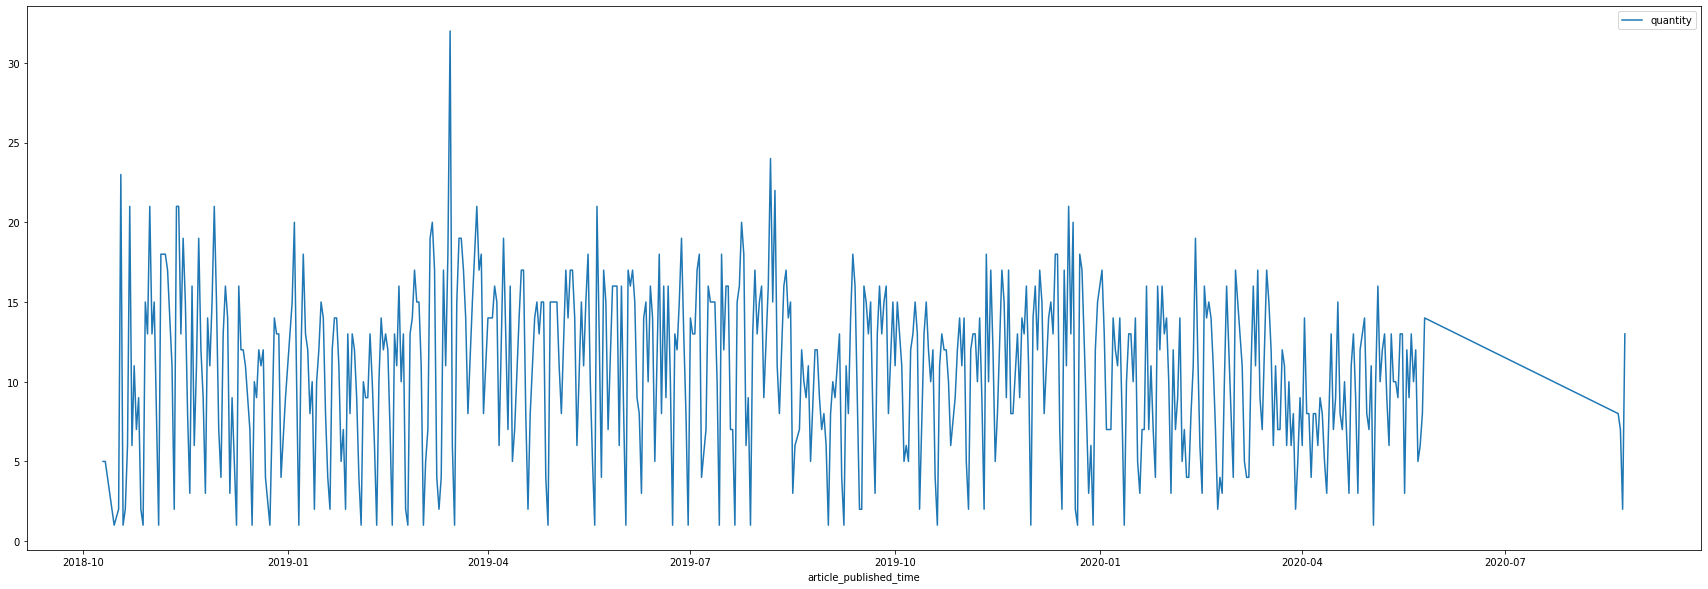

In [14]:
br104_df['article_published_time'] = pd.to_datetime(br104_df['article_published_time'])
articles_by_date = br104_df.groupby([br104_df['article_published_time'].dt.date]).count()
articles_by_date = articles_by_date[['og_url']].sort_values(by=["article_published_time"], ascending=False)
articles_by_date.columns = ['quantity']
articles_by_date.to_csv('artigos_por_dia.csv')
articles_by_date.plot(figsize=(30,10))